In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('/content/FInalDatasetRealEstateScrapping.csv')
df.head(5)

,address_name,address_price,address_areaSQFT,address_bhk,address_type,city
0,Mangrouli,14.00,891,NaN,NaN,agra
1,Rakabganj,3.00,4400,5.0,Independent House,agra
2,Baroli Ahir,35.00,1232,3.0,Apartment,agra
3,New Suraksha Vihar Phase 2,31.50,890,3.0,Independent House,agra
4,Arjun Nagar,1.39,2250,6.0,Independent House,agra


since scrapped data has value for sqft and bhk interchanged for chennai
we need to correct it

In [ ]:
df['address_type'].fillna('Apartment',inplace=True)

for lucknow builder and bhk are inter changed

In [ ]:
# m=df['city']=='Lucknow'
# df.loc[m, ['address_builder', 'address_bhk']] = (
#     df.loc[m, ['address_bhk', 'address_builder']].values)

In [ ]:
df.to_csv('corrected.csv')

replacing all null values of builder by seller

In [ ]:
# df['address_builder'].fillna('seller',inplace=True)

similarly for other columns

In [ ]:
df.isna().sum()

address_name           0
address_price          0
address_areaSQFT       0
address_bhk         5200
address_type           0
city                   0
dtype: int64

In [ ]:
median=df['address_bhk'].median()
df['address_bhk'].fillna(median,inplace=True)
df.isna().sum()

address_name        0
address_price       0
address_areaSQFT    0
address_bhk         0
address_type        0
city                0
dtype: int64

In [ ]:
df = df.dropna(how='any',axis=0)
df.isna().sum()

address_name        0
address_price       0
address_areaSQFT    0
address_bhk         0
address_type        0
city                0
dtype: int64

Successfully Null values are managed in dataset

In [ ]:
# m=df['address_areaSQFT']
# list=[]
# for k in m:
#    l= [int(i) for i in k.split() if i.isdigit()]
#    list.append(l)
# df['address_areaSQFT']=pd.DataFrame(list)

In [ ]:
df.isna().sum()

address_name        0
address_price       0
address_areaSQFT    0
address_bhk         0
address_type        0
city                0
dtype: int64

In [ ]:
median=df['address_areaSQFT'].median()
df['address_areaSQFT'].fillna(median,inplace=True)
df.isna().sum()

address_name        0
address_price       0
address_areaSQFT    0
address_bhk         0
address_type        0
city                0
dtype: int64

In [ ]:
m=df['address_price']
l=[]
for k in m:
  if k<=5.0:
    l.append(k*100)
  else:
    l.append(k)
df['address_price']=pd.DataFrame(l)


In [ ]:
df.isna().sum()
df.dropna(inplace=True)
df.to_csv("corrected.csv", index=False)
df=pd.read_csv('/content/corrected.csv', index_col=False)

In [ ]:
df.head(10)

,address_name,address_price,address_areaSQFT,address_bhk,address_type,city
0,Mangrouli,14.00,891,3.0,Apartment,agra
1,Rakabganj,300.00,4400,5.0,Independent House,agra
2,Baroli Ahir,35.00,1232,3.0,Apartment,agra
3,New Suraksha Vihar Phase 2,31.50,890,3.0,Independent House,agra
4,Arjun Nagar,139.00,2250,6.0,Independent House,agra
5,Dayal Bagh,11.11,1111,1.0,Studio Apartment,agra
6,Kamla Nagar,68.00,1700,3.0,Apartment,agra
7,Mangrouli,15.00,588,3.0,Apartment,agra
8,Sewla Jatt,22.50,810,3.0,Independent House,agra
9,Rohta,26.00,1080,4.0,Independent House,agra


In [ ]:
df1=df

location_stats = df1.groupby('address_name')['address_name'].agg('count').sort_values(ascending=False)

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Series([], Name: address_name, dtype: int64)

In [ ]:
df1.address_name=df1.address_name.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
df2=df1[df1.address_name!='other']
df2.dropna()
stats=df2.groupby('address_name')['address_name'].agg('count')
print(stats)

address_name
Agra Cantt             200
Amritsar Cantonment    200
Anjanapura             200
Arjun Nagar            200
Baba Phoola Singh      200
                      ... 
West Tambaram          200
Yeida                  200
Yeshwantpur            200
dwarka sector 17       200
laxmi nagar            200
Name: address_name, Length: 154, dtype: int64


In [ ]:
df2.groupby('city')['city'].agg('count')

city
agra         4000
ahemdabad    4000
amritsar     4000
banglore     4000
chennai      4000
delhi        4000
hyderabad    4000
lucknow      4000
mumbai       4000
noida        4000
Name: city, dtype: int64

In [ ]:
cities=df2.city.unique()

In [ ]:
for city in cities:
   df3=df2[df2['city']==city]['address_name']
   df3=df3.unique()
   df3=pd.DataFrame(df3)
  #  df3.to_csv('/content/cityWiseData/'+city+"Unique.csv")

df5=df2.copy()
df6=df2.copy()


TRYING REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
# y=df3['address_price']
# X=df3.drop('address_price',axis="columns")
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
# cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0) 
# cross_val_score(LinearRegression(), X,y, cv=cv)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# dr=DecisionTreeRegressor(criterion='mae', splitter='best',)
# dr.fit(X_train,y_train)

# dr.score(X_test,y_test)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
temp2= label_encoder.fit_transform(df5['address_name'])
temp1=label_encoder.inverse_transform(temp2)
df5['address_name']=temp2

In [ ]:
print(temp1)
print(temp2)
address_dict={}
i=0
for city in temp1:
    address_dict[city]=temp2[i]
    i+=1

print(address_dict)
    

['Mangrouli' 'Rakabganj' 'Baroli Ahir' ... 'Sanath Nagar' 'Banjara Hills'
 'Tellapur']
[ 67  91   9 ...  97   8 126]
{'Mangrouli': 67, 'Rakabganj': 91, 'Baroli Ahir': 9, 'New Suraksha Vihar Phase 2': 83, 'Arjun Nagar': 3, 'Dayal Bagh': 23, 'Kamla Nagar': 50, 'Sewla Jatt': 116, 'Rohta': 95, 'Agra Cantt': 0, 'Sector 143B': 103, 'Sector 150': 104, 'Sector 78': 110, 'Sector 36': 107, 'Sector 82': 112, 'Sector 143': 102, 'Sector 128': 101, 'Sector 92': 113, 'Sector 22D Yamuna Expressway': 106, 'Sector 62': 108, 'Sector 93': 114, 'Sector 110': 100, 'Sector 167': 105, 'Sector 74': 109, 'Yeida': 150, 'Ellisbridge': 29, 'Vatva': 144, 'Ranip': 92, 'Tragad': 132, 'Gota': 35, 'Kasindra': 53, 'Chanakyapuri': 16, 'Navrangpura': 82, 'Bavla': 10, 'Vastral': 143, 'Chandkheda': 17, 'Wadaj': 148, 'Bopal': 13, 'Shela': 119, 'Changodar': 18, 'Maninagar': 69, 'Vasant Kunj': 141, 'Mehrauli': 72, 'Tughlakabad': 133, 'Dwarka Sector 15': 28, 'Greater Kailash': 37, 'dwarka sector 17': 152, 'laxmi nagar': 153, 'U

In [ ]:
# df5=df5[df5.city!='banglore']


temp2= label_encoder.fit_transform(df5['city'])
temp1=label_encoder.inverse_transform(temp2)
df5['city']=temp2

city_check={}
i=0
for city in temp1:
    city_check[city]=temp2[i]
    i+=1

print(city_check)


y=df5['address_price']
# df5=df5.drop('address_builder',axis='columns')
df5=df5.drop('address_price',axis='columns')
# column='address_areaSQFT'
# df5[column] = MinMaxScaler().fit_transform(np.array(df5[column]).reshape(-1,1))
X=df5
X1=df5
Y1=y

{'agra': 0, 'noida': 9, 'ahemdabad': 1, 'delhi': 5, 'chennai': 4, 'banglore': 3, 'amritsar': 2, 'mumbai': 8, 'lucknow': 7, 'hyderabad': 6}


In [ ]:
temp2= label_encoder.fit_transform(df5['address_type'])
temp1=label_encoder.inverse_transform(temp2)
df5['address_type']=temp2

address_type_check={}
i=0
for city in temp1:
    address_type_check[city]=temp2[i]
    i+=1

print(address_type_check)

{'Apartment': 0, 'Independent House': 2, 'Studio Apartment': 3, 'Villa': 4, 'Independent Floor': 1}


In [ ]:
print(Y1)

0         14.00
1        300.00
2         35.00
3         31.50
4        139.00
          ...  
39995     45.09
39996    275.00
39997    124.00
39998    239.00
39999    116.00
Name: address_price, Length: 40000, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
dr=DecisionTreeRegressor(criterion='mae', splitter='best',)
dr.fit(X_train,y_train)
dr.score(X_test,y_test)

In [ ]:
X_train

,address_name,address_areaSQFT,address_bhk,address_type,city
33113,147,1425,3.0,0,7
23268,55,1670,3.0,0,3
25562,93,850,2.0,0,2
28539,31,686,2.0,0,8
7419,150,450,3.0,0,9
...,...,...,...,...,...
10201,144,1296,2.0,0,1
9372,148,1836,3.0,0,1
28017,128,301,1.0,0,8
29199,31,686,2.0,0,8


In [ ]:
df5.city.unique()

array([0, 9, 1, 5, 4, 3, 2, 8, 7, 6])

In [ ]:
df5

,address_name,address_areaSQFT,address_bhk,address_type,city
0,67,891,3.0,0,0
1,91,4400,5.0,2,0
2,9,1232,3.0,0,0
3,83,890,3.0,2,0
4,3,2250,6.0,2,0
...,...,...,...,...,...
39995,19,1503,3.0,0,6
39996,118,3800,5.0,4,6
39997,97,2294,3.0,0,6
39998,8,2085,3.0,0,6


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df_sklearn = df5.copy()
# column = 'address_name'
# df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))

# column = 'address_areaSQFT'
# df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))

# column = 'address_bhk'
# df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))


X=df_sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

 


In [ ]:
y_pred=dr.predict(X_test)
for i in range (0,len(y_pred)):
     print(y_pred[i])

In [ ]:
print(cities)

['agra' 'noida' 'ahemdabad' 'delhi' 'chennai' 'banglore' 'amritsar'
 'mumbai' 'lucknow' 'hyderabad']


In [ ]:
df6

,address_name,address_price,address_areaSQFT,address_bhk,address_type,city
0,Mangrouli,14.00,891,3.0,Apartment,agra
1,Rakabganj,300.00,4400,5.0,Independent House,agra
2,Baroli Ahir,35.00,1232,3.0,Apartment,agra
3,New Suraksha Vihar Phase 2,31.50,890,3.0,Independent House,agra
4,Arjun Nagar,139.00,2250,6.0,Independent House,agra
...,...,...,...,...,...,...
39995,Cheeriyal,45.09,1503,3.0,Apartment,hyderabad
39996,Shamshabad,275.00,3800,5.0,Villa,hyderabad
39997,Sanath Nagar,124.00,2294,3.0,Apartment,hyderabad
39998,Banjara Hills,239.00,2085,3.0,Apartment,hyderabad


In [ ]:
from sklearn.metrics import r2_score
for city in cities:
  print(city)
  df7=df6[df6.city==city]
  y=df7['address_price']
  df7=df7.drop('address_price',axis='columns')
  # df7=df7.drop('address_builder',axis='columns')
  df7=df7.drop('city',axis='columns')
  df7['address_name']= label_encoder.fit_transform(df7['address_name'])
  X=df7
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
   

In [ ]:
X=X1
y=Y1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
cv = ShuffleSplit(n_splits=4, test_size=0.30, random_state=0) 
cross_val_score(DecisionTreeRegressor(), X,y, cv=cv)


array([0.99997823, 0.9999774 , 0.99997686, 0.99997395])

In [ ]:
dr=LinearRegression()
dr.fit(X_train,y_train)

dr.score(X_test,y_test)

0.20615929174839354

In [ ]:
y_pred=dr.predict(X_test)
errors = mean_squared_error(y_test,y_pred)
print(errors)

4905.4799545933265


In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 41.68410889752497


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.20615929174839354


In [ ]:
y_train

33113     74.92
23268     83.50
25562     15.00
28539    168.00
7419      11.49
          ...  
10201     25.50
9372      85.66
28017     39.99
29199    168.00
17673    120.00
Name: address_price, Length: 28000, dtype: float64

In [ ]:
from sklearn.linear_model import Ridge
dr=Ridge()
dr.fit(X_train,y_train)
dr.score(X_test,y_test)

0.20615928438914166

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dr=DecisionTreeRegressor(criterion='mae',splitter='random',max_depth=10)
dr.fit(X_train,y_train)
dr.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


0.787782040478136

In [ ]:
cv = ShuffleSplit(n_splits=4, test_size=0.30, random_state=0) 
cross_val_score(DecisionTreeRegressor(criterion='mae',splitter='random',max_depth=10), X,y, cv=cv)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


array([0.93173986, 0.94729795, 0.95055976, 0.94811008])

In [ ]:
from sklearn import svm
dr=svm.SVR()
dr.fit(X_train,y_train)
dr.score(X_test,y_test)

0.23755342773536636

In [ ]:
from sklearn import linear_model
dr = linear_model.Lasso(alpha=0.1)
dr.fit(X_train,y_train)
dr.score(X_test,y_test)

0.2061581008081994

In [ ]:
!pip install xgboost
!pip install lightgbm
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
import xgboost
import lightgbm as lgb

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearch(X, y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','mae'],
                'splitter': ['best', 'random'],
                'max_depth':[4,8,9]
            }
        },
        'ada':
        {
            'model':AdaBoostRegressor(random_state=0),
            'params':{
                'n_estimators':[200,150],
                'learning_rate':[1.5,1]
            }
        },
        'xgboost':
        {
            'model':xgboost.XGBRegressor(),
            'params':{
                'n_estimators':[10,15],
                 'max_depth':[20,15]

            }
        },
        'lightGBM':
        {
            'model':lgb.LGBMRegressor(),
             'params':
            {
                 'learning_rate':[0.04,0.09],
                 'max_depth':[3,4],
            }
        },
        'catboost':
        {
            'model':CatBoostRegressor(iterations=100,learning_rate=0.1, loss_function='RMSE'),
            'params':
         {
             'depth':[2,3],
         }
            
        },

    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=1)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearch(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[15:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,model,best_score,best_params
0,decision_tree,0.975019,"{'criterion': 'mse', 'max_depth': 9, 'splitter..."
1,ada,0.656284,"{'learning_rate': 1, 'n_estimators': 200}"
2,xgboost,0.913266,"{'max_depth': 15, 'n_estimators': 15}"
3,lightGBM,0.978750,"{'learning_rate': 0.09, 'max_depth': 4}"
4,catboost,0.875169,{'depth': 3}


In [ ]:
cross_val_score(lgb.LGBMRegressor(learning_rate=0.09,max_depth=4), X,y, cv=cv)

array([0.97920244, 0.97277135, 0.97638403, 0.97510675])

In [ ]:
mo=CatBoostRegressor(iterations=100,learning_rate=0.1, loss_function='RMSE',max_depth=3)
mo.fit(X_train,y_train)
cross_val_score(mo, X,y, cv=cv)

0:	learn: 78.8802864	total: 3.07ms	remaining: 304ms
1:	learn: 76.8824784	total: 5.79ms	remaining: 284ms
2:	learn: 75.0314560	total: 8.72ms	remaining: 282ms
3:	learn: 72.9797576	total: 11.5ms	remaining: 275ms
4:	learn: 71.4843980	total: 14.1ms	remaining: 268ms
5:	learn: 70.2787684	total: 16.8ms	remaining: 264ms
6:	learn: 69.1941791	total: 19.6ms	remaining: 261ms
7:	learn: 67.6116283	total: 22.5ms	remaining: 259ms
8:	learn: 66.6074747	total: 25.3ms	remaining: 255ms
9:	learn: 65.7232600	total: 28ms	remaining: 252ms
10:	learn: 64.4325756	total: 30.7ms	remaining: 249ms
11:	learn: 63.3543916	total: 33.6ms	remaining: 246ms
12:	learn: 62.3886569	total: 36.5ms	remaining: 244ms
13:	learn: 61.7055066	total: 39.2ms	remaining: 241ms
14:	learn: 61.0383126	total: 41.9ms	remaining: 237ms
15:	learn: 60.5219989	total: 44.5ms	remaining: 234ms
16:	learn: 59.9355163	total: 47.3ms	remaining: 231ms
17:	learn: 58.9730853	total: 50.4ms	remaining: 230ms
18:	learn: 58.4562392	total: 53.3ms	remaining: 227ms
19:	l

array([0.86976661, 0.87035071, 0.864081  , 0.86465171])

In [ ]:
dr1=DecisionTreeRegressor(criterion='mse',splitter='random',max_depth=9)
dr1.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=9, splitter='random')

In [ ]:
dr1=lgb.LGBMRegressor(learning_rate=0.09,max_depth=4)
dr1.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.09, max_depth=4)

saving picle file and key value pair (encoded values)

In [ ]:
import pickle
pickle.dump(dr1, open('model.pkl', 'wb'))

In [ ]:
import csv
with open('address_dict.csv', 'w') as f:
    for key in address_dict.keys():
        f.write("%s,%s\n"%(key,address_dict[key]))

with open('city_check.csv', 'w') as f:
    for key in city_check.keys():
        f.write("%s,%s\n"%(key,city_check[key]))
with open('address_type.csv', 'w') as f:
    for key in address_type_check.keys():
        f.write("%s,%s\n"%(key,address_type_check[key]))


In [ ]:
# dictionaries with encoded value -> address_dict ,city_check

In [ ]:
import pickle
loaded_model = pickle.load(open('model.pkl', 'rb'))


In [ ]:
cities

array(['agra', 'noida', 'ahemdabad', 'delhi', 'chennai', 'banglore',
       'amritsar', 'mumbai', 'lucknow', 'hyderabad'], dtype=object)

In [ ]:
df

,address_name,address_price,address_areaSQFT,address_bhk,address_type,city
0,Mangrouli,14.00,891,3.0,Apartment,agra
1,Rakabganj,300.00,4400,5.0,Independent House,agra
2,Baroli Ahir,35.00,1232,3.0,Apartment,agra
3,New Suraksha Vihar Phase 2,31.50,890,3.0,Independent House,agra
4,Arjun Nagar,139.00,2250,6.0,Independent House,agra
...,...,...,...,...,...,...
39995,Cheeriyal,45.09,1503,3.0,Apartment,hyderabad
39996,Shamshabad,275.00,3800,5.0,Villa,hyderabad
39997,Sanath Nagar,124.00,2294,3.0,Apartment,hyderabad
39998,Banjara Hills,239.00,2085,3.0,Apartment,hyderabad


In [ ]:
#price per square feet
dict={}
x=[]
y=[]
for city1 in cities:
  d=df[df['city']==city1]
  d=d['address_price']/d['address_areaSQFT']
  d=d.mean()
  d=d*100000
  x.append(city1)
  y.append(d)
  dict[city1]=d
  print(city1+"->"+str(d))

agra->5832.465499419659
noida->9376.570538747921
ahemdabad->4065.517324310184
delhi->6581.689748909152
chennai->5029.422891151236
banglore->6528.075357779867
amritsar->2604.6695621972
mumbai->17082.409059292517
lucknow->3796.9143639557396
hyderabad->5285.167422591979


In [ ]:
dict

{'agra': 5832.465499419659,
 'ahemdabad': 4065.517324310184,
 'amritsar': 2604.6695621972,
 'banglore': 6528.075357779867,
 'chennai': 5029.422891151236,
 'delhi': 6581.689748909152,
 'hyderabad': 5285.167422591979,
 'lucknow': 3796.9143639557396,
 'mumbai': 17082.409059292517,
 'noida': 9376.570538747921}

Text(0, 0.5, 'Mean Price per square feet')

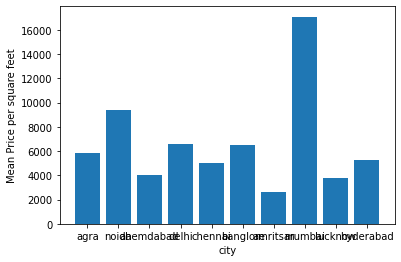

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.bar(x,y)
plt.xlabel('city')
plt.ylabel('Mean Price per square feet')

In [ ]:
df

,address_name,address_price,address_areaSQFT,address_bhk,address_type,city
0,Mangrouli,14.00,891,3.0,Apartment,agra
1,Rakabganj,300.00,4400,5.0,Independent House,agra
2,Baroli Ahir,35.00,1232,3.0,Apartment,agra
3,New Suraksha Vihar Phase 2,31.50,890,3.0,Independent House,agra
4,Arjun Nagar,139.00,2250,6.0,Independent House,agra
...,...,...,...,...,...,...
39995,Cheeriyal,45.09,1503,3.0,Apartment,hyderabad
39996,Shamshabad,275.00,3800,5.0,Villa,hyderabad
39997,Sanath Nagar,124.00,2294,3.0,Apartment,hyderabad
39998,Banjara Hills,239.00,2085,3.0,Apartment,hyderabad


In [ ]:

def plot_scatter_chart(df,location):
    '''
    Function that will help us to visualize the data of the different locations 
    '''
    bhk2 = df[ (df.address_bhk==2)]
    bhk3 = df[ (df.address_bhk==3)]
    bhk1 = df[ (df.address_bhk==1)]
    bhk4 = df[ (df.address_bhk==4)]
    bhk5 = df[(df.address_bhk==5)]
    bhk6 = df[ (df.address_bhk==6)]
    matplotlib.rcParams['figure.figsize'] = (10, 10)
    plt.scatter(bhk1.address_areaSQFT, bhk1.address_price,color='blue', label='1 BHK', s=15)
    plt.scatter(bhk2.address_areaSQFT, bhk2.address_price,color='yellow', label='2 BHK', s=15)
    plt.scatter(bhk3.address_areaSQFT,bhk3.address_price ,color='red', label='3 BHK',s=15)
    plt.scatter(bhk4.address_areaSQFT, bhk4.address_price,color='green', label='4 BHK', s=15)
    plt.scatter(bhk5.address_areaSQFT, bhk5.address_price,color='black', label='5 BHK', s=15)
    plt.scatter(bhk6.address_areaSQFT, bhk6.address_price,color='grey', label='6 BHK', s=15)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price in lakhs')
    plt.legend()
    plt.show()
    print(len(bhk1.address_areaSQFT)+len(bhk2.address_areaSQFT)+len(bhk3.address_areaSQFT)+len(bhk4.address_areaSQFT)+len(bhk5.address_areaSQFT)+len(bhk6.address_areaSQFT))

Text(0, 0.5, 'Price')

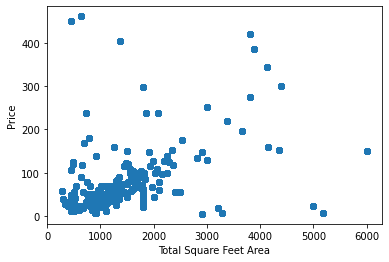

In [ ]:

bhk3 = df
x=list(bhk3.address_areaSQFT)
y=list(bhk3.address_price)
plt.scatter(x,y)
plt.xlabel('Total Square Feet Area')
plt.ylabel('Price')


In [ ]:
df5['price']=y
correlation_table= []
cat_features=['address_areaSQFT','address_bhk']

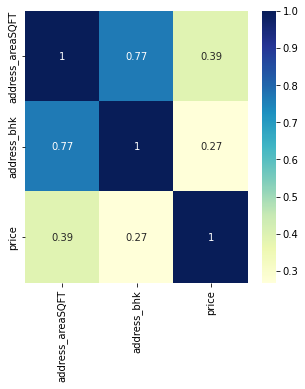

In [ ]:
plt.figure(figsize=(5,5))
df5['price']=y
cor = df5[['address_areaSQFT','address_bhk','price']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

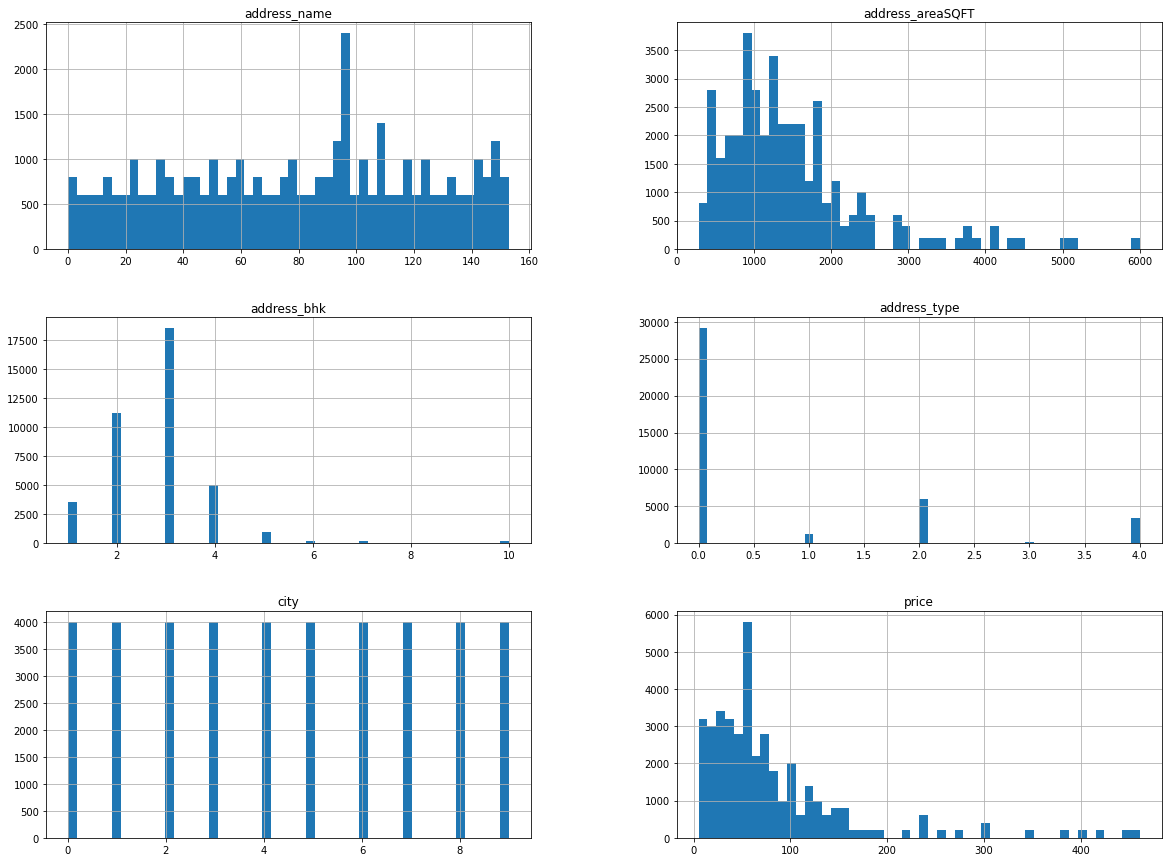

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df5.hist(bins=50,figsize=(20,15))
plt.show()